# Latar Belakang

Diversifikasi cara penjualan bagi pelanggan untuk mengakses kebutuhan *groceries* adalah hal yang penting bagi supermarket untuk memudahkan para pembeli. Namun, beberapa orang tetap ingin datang secara langsung ke supermarket untuk membeli *groceries* mereka. Terlebih, seperti seluruh *retail business* yang ada, *promotion* merupakan aspek penting yang dapat dilakukan oleh *management* untuk menaikkan *sales* perusahaan.

Sebuah supermarket di Amerika Serikat hendak menaikkan angka *sales* mereka dengan cara menganalisis berbagai jenis data customers yang mereka miliki. Selain dari itu, mereka juga hendak melakukan analisis campaign yang telah mereka lakukan serta melakukan analisis terhadap selling channels

# Rumusan Masalah

Supermarket ini perlu mengidentifikasi *customer lifetime value* dan *customer behaviour analysis* agar promotion dan selling channel mereka lebih tepat sehingga mengurangi biaya operasional dan menaikkan efektifitas penjualan. *Management* supermarket hendak mengetahui:
- Target market paling potensial dari supermarket.
- Produk paling diminati customer untuk spending.
- *Campaign* paling efektif yang telah dijalankan selama 2 tahun kebelakang beserta rekomendasi untuk *campaign* berikutnya.
- *Selling channel* yang efektif untuk profit supermarket.


# Data Understanding

Untuk menjawab rumusan masalah diatas, dilakukan data understanding pada data supermarket customer yang tersedia agar dapat dipahami dan dilakukan penyesuaian dengan cara data cleaning pada data yang tidak diperlukan dalam analisis.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime
import missingno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [122]:
df = pd.read_csv('Supermarket Customers.csv', sep='\t')
pd.set_option('display.max_columns', None)
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


## Supermarket Customers Data Dictionary:
#### People
- ID                : Customer's unique identifier
- Year_Birth        : Customer's birth year
- Education         : Customer's education level
- Martial_Status    : Customer's martial status
- Income            : Customer's yearly houshold income
- Kidhome           : Number of children in customer's household
- Teenhome          : Number of teenagers in customer's household
- Dt_Customer       : Date of customer's enrollment with the company
- Recency           : Number of days since customer's last purchase
- Complain          : 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines          : Amount spent on wine in last 2 years
- MntFruits         : Amount spent on fruits in last 2 years
- MntMeatProducts   : Amount spent on meat in last 2 years
- MntFishProducts   : Amount spent on fish in last 2 years
- MntSweetProducts  : Amount spent on sweets in last 2 years
- MntGoldProds      : Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases : Number of purchases made with a discount
- AcceptedCmp1      : 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2      : 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3      : 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4      : 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5      : 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response          : 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases       : Number of purchases made through the company's website
- NumCatalogPurchases   : Number of purchases made using a catalog
- NumStorePurchases     : Number of purchases made directly in stores
- NumWebVisitsMonth     : Number of visits to the company's website in the last month

In [123]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [124]:
pd.set_option('display.max_columns', None)
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [125]:
# Melhat unique values pada setiap kolom dengan tipe object

unique_values_list = []

for column in df.select_dtypes(include=['object']):
    unique_values = df[column].unique()
    unique_values_list.append({'Column Name': column, 'Unique Values': unique_values})

unique_values_df = pd.DataFrame(unique_values_list)

print(unique_values_df)

      Column Name                                      Unique Values
0       Education         [Graduation, PhD, Master, Basic, 2n Cycle]
1  Marital_Status  [Single, Together, Married, Divorced, Widow, A...
2     Dt_Customer  [04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...


In [126]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Dari data understanding pada dataset Supermarket Customers, dapat disimpulkan bahwa:
- Data Supermarket memiliki 2240 row dan 29 column.
- Dari 29 column tersebut, dibagi kategori menjadi; detil identitas *customer* (*people*), informasi produk (*product*), keberhasilan menarik customers dari beberapa opsi pemasaran 2 tahun terakhir (*promotion*), dan jalur penjualan (*place*)
- Pada kolom Income terdapat data kosong dengan jumlah 24.
- Kolom Dt_Customer perlu diganti tipe datanya dari object menjadi date.
- Kolom ID dapat dihapus karena tidak relevan dengan analisis.
- Pada kolom Marital_Status perlu dilakukan handling menjadi 5 kategori (single, together, married, divorced, dan other)
- Pada kolom Education perlu dilakukan handling menjadi 3 kategori (Low Education, Middle Education, dan High Education)
- Mengganti kolom Year_Birth menjadi Age agar memudahkan analisis
- Membuat kolom Enrollment_Age yang menunjukkan sudah berapa lama customer tersebut berlangganan dengan supermarket agar memudahkan analisis
- Menghapus kolom Z_CostContact dan Z_Revenue karena tidak terdapat kejelasan pada Dictionary yang disediakan
- Pada kolom Age terdapat outliers yang perlu dihandling.
- Asumsi income dalam USD
- Asumsi kid age (0-10) dan teenagers age (10-19) (source: https://data.unicef.org/topic/adolescents/overview/)


# Data Cleaning
untuk menyelesaikan rumusan masalah yang telah ditetapkan, dilakukan data cleaning untuk menyesuaikan data yang diperlukan.

Dt_Customer menunjukkan tanggal awal customer berlangganan dengan supermarket, maka tipe datanya diubah menjadi datetime.

In [127]:
# mengganti tipe data Dt_Customer menjadi datetime.

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
print(df['Dt_Customer'].dtypes)

datetime64[ns]


Penghapusan kolom ID karena tidak relevan dengan analisis.

In [128]:
df.drop('ID', axis=1, inplace = True)

Handling Marital_Status dengan simplifikasi menjadi 5 kategori (Single, Together, Married, Divorced, Other). Kategori other untuk data entry Absurd dan YOLO.

In [129]:
df['Marital_Status'] = df['Marital_Status'].map({
    'Single': 'Single',
    'Together': 'Together',
    'Married': 'Married',
    'Divorced': 'Divorced',
    'Widow': 'Divorced',
    'Alone': 'Single',     
    'Absurd': 'Other', 
    'YOLO': 'Other'
})

print(df['Marital_Status'].unique())


['Single' 'Together' 'Married' 'Divorced' 'Other']


Handling Education column dengan simplifikasi menjadi 3 kategori (Low Education untuk Basic, Mid Education untuk 2n Cycle; Graduation; Master, dan High Education untuk PhD)

In [130]:
df['Education'] = df['Education'].map({
    'Basic': 'Low Education',
    '2n Cycle': 'Mid Education',
    'Graduation': 'Mid Education',
    'Master': 'Mid Education',
    'PhD': 'High Education'
})

print(df['Education'].unique())

['Mid Education' 'High Education' 'Low Education']


Handling Year_Birth column dengan menggantinya menjadi Age yang merupakan kolom umur dari customer agar lebih mudah saat analisis.

In [131]:
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

df.drop('Year_Birth', axis=1, inplace=True)

display(df['Age'].describe())

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

Penambahan Enrollment_Age dengan mengacu dari kolom Dt_Customer

In [132]:
current_year = datetime.now().year
df['Enrollment_Age'] = current_year - df['Dt_Customer'].dt.year

display(df['Enrollment_Age'].describe())

count    2240.000000
mean        9.971875
std         0.684554
min         9.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        11.000000
Name: Enrollment_Age, dtype: float64

Penghapusan kolom Z_CostContact dan Z_Revenue

In [133]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

Handling duplicates pada data supermarket customer

In [134]:
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 83 to 2236
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            183 non-null    object        
 1   Marital_Status       183 non-null    object        
 2   Income               183 non-null    float64       
 3   Kidhome              183 non-null    int64         
 4   Teenhome             183 non-null    int64         
 5   Dt_Customer          183 non-null    datetime64[ns]
 6   Recency              183 non-null    int64         
 7   MntWines             183 non-null    int64         
 8   MntFruits            183 non-null    int64         
 9   MntMeatProducts      183 non-null    int64         
 10  MntFishProducts      183 non-null    int64         
 11  MntSweetProducts     183 non-null    int64         
 12  MntGoldProds         183 non-null    int64         
 13  NumDealsPurchases    183 non-null    i

In [135]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Enrollment_Age
0,Mid Education,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,11
1,Mid Education,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,9
2,Mid Education,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,10
3,Mid Education,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,9
4,High Education,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,Mid Education,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,46,10
2053,Mid Education,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,56,10
2054,Mid Education,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,42,9
2055,Mid Education,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,67,9


Handling missing values pada kolom income

In [136]:
df['Income'].describe()

count      2033.000000
mean      52366.734875
std       25530.049924
min        1730.000000
25%       35544.000000
50%       51537.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: >

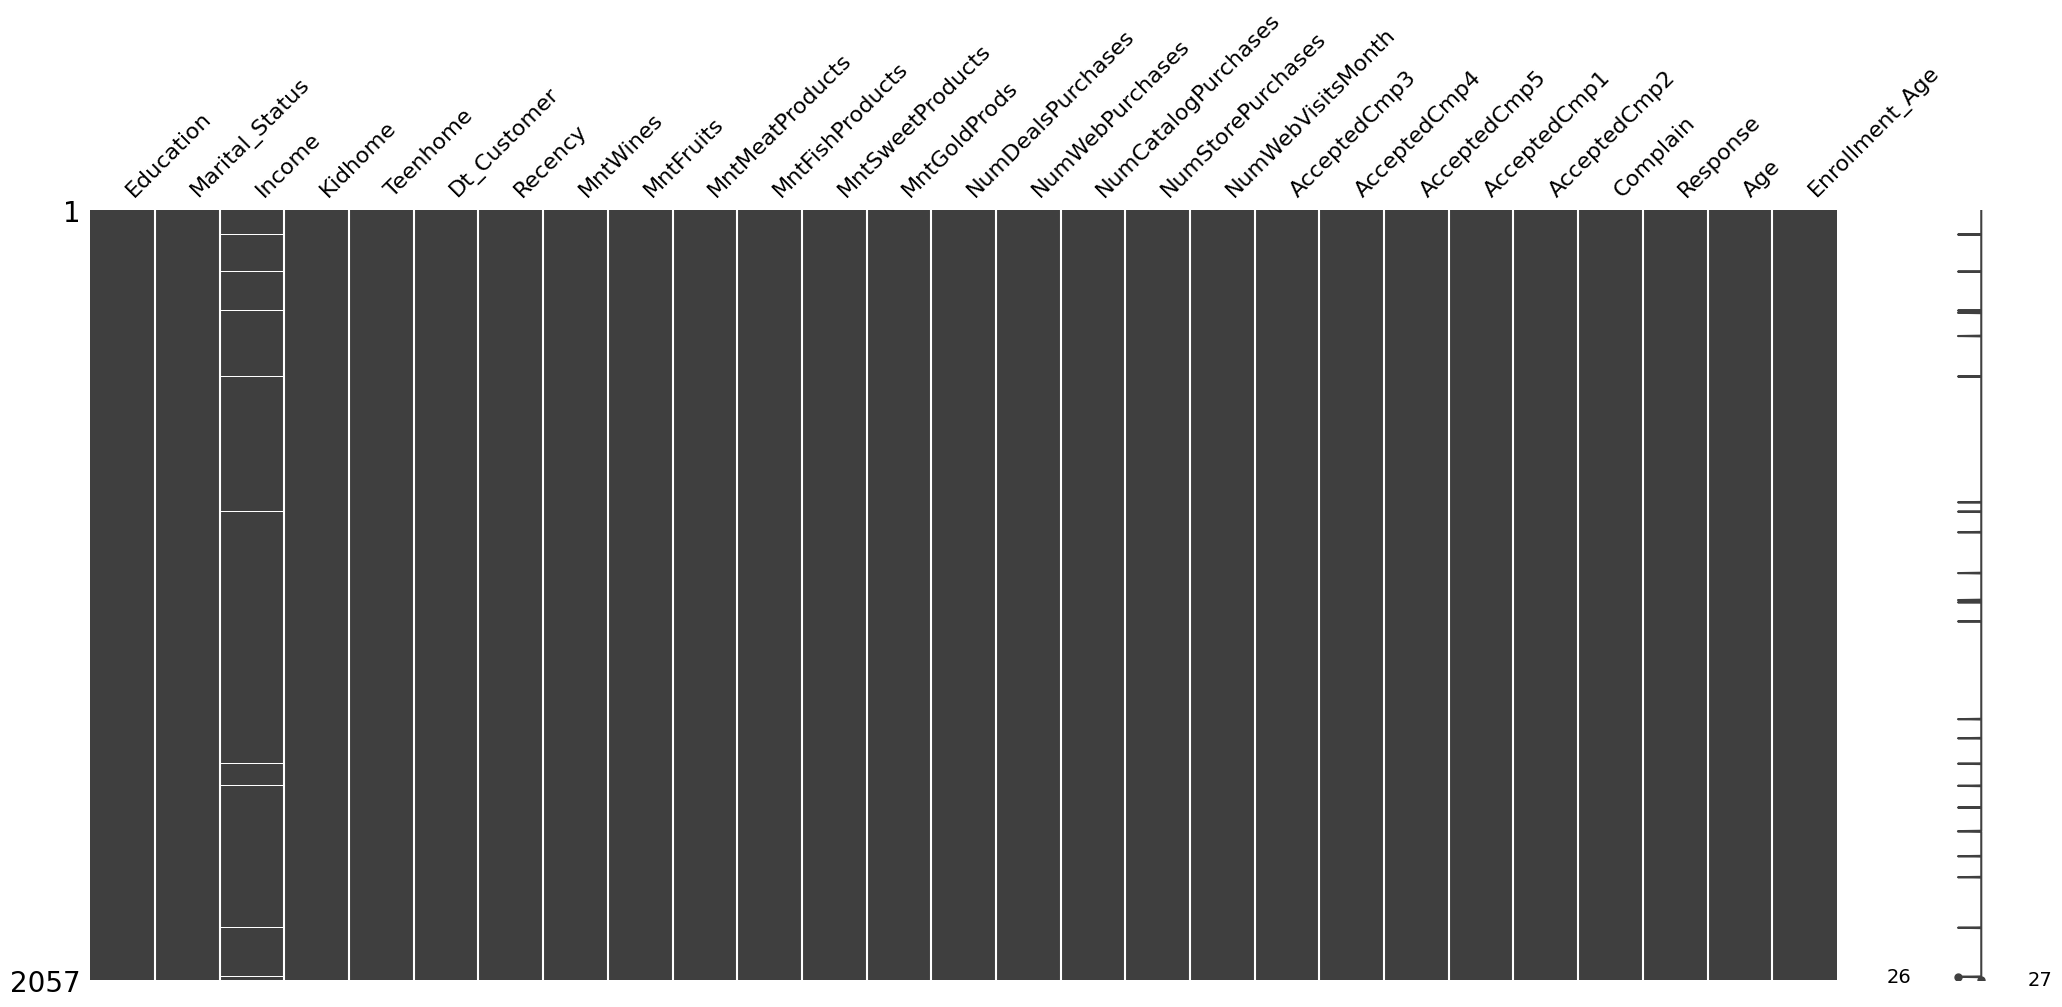

In [137]:
df_age = df.sort_values(by = 'Age')
missingno.matrix(df_age)

dilihat dari matrix diatas, bahwa dengan mengurutkan umur, missing value income tetap tidak ada secara random, tidak hanya pada umur tertentu.

<Axes: >

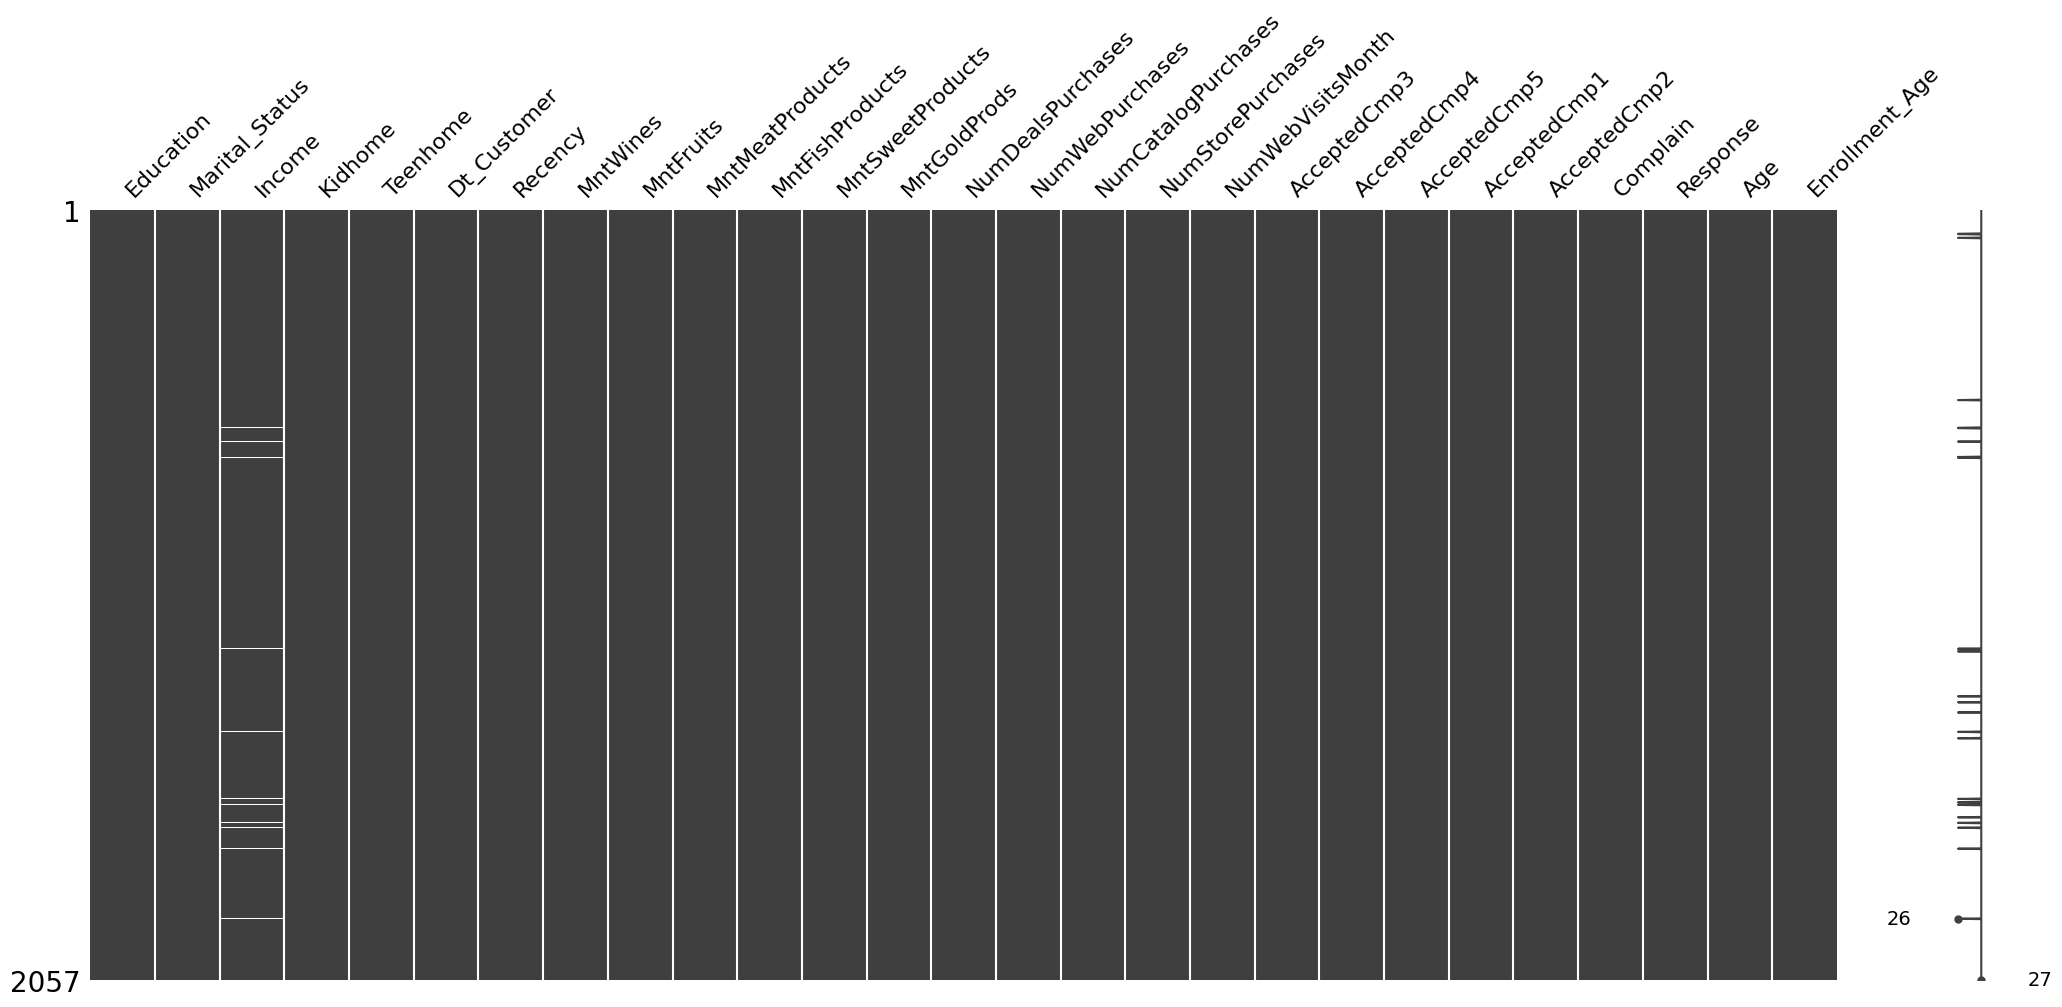

In [138]:
education_sort_order = {
    'Low Education': 1,
    'Mid Education': 2,
    'High Education': 3
}

def education_sort_key(x):
    return education_sort_order.get(x, 0) 

df_sorted_education = df.sort_values(by='Education', key=lambda x: x.map(education_sort_key))

missingno.matrix(df_sorted_education)


dilihat dari matrix diatas, bahwa dengan mengurutkan education level, missing value income tetap tidak ada secara random, tidak hanya pada education level tertentu.

In [139]:
# Presentase data kosong pada income terhadap keseluruhan data income

df['Income'].isna().sum()/df.shape[0]*100

1.166747690811862

Missing value pada kolom income merupakan tipe MCAR dimana customer sengaja atau tidak sengaja tidak mengisi data income saat registrasi langganan dengan supermarket. Kemudian, hanya sebesar 1.07% dari keseluruhan data, maka untuk handling missing value ini dapat diisi dengan cara iterative imputer.

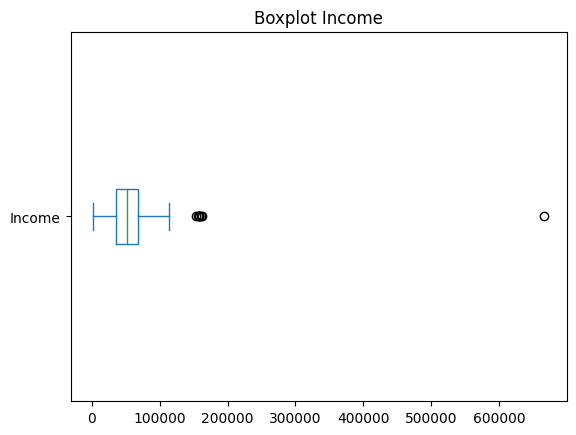

In [140]:
plt.title('Boxplot Income')

df['Income'].plot(kind= 'box', vert= False, title= 'Boxplot Income');


Sebelum melakukan handling missing value dengan iterative imputer, dilihat dari data Boxplot Income diatas, terdapat 1 outliers pada data entry income yang cukup jauh dibandingkan dengan data lainnya. Maka, data tersebut harus di drop terlebih dahulu.

In [141]:
df = df.drop(df['Income'].idxmax(), axis = 0)
df = df.reset_index(drop=True)

Kemudian dilakukan iterative imputer untuk mengisi missing value pada kolom Income.

In [142]:
columns_to_impute = ['Income']
impute_df = df[columns_to_impute]
imputer = IterativeImputer(max_iter=1000, random_state=0)
imputer.fit(impute_df)
imputed_columns = imputer.transform(impute_df)
imputed_df = pd.DataFrame(imputed_columns, columns=columns_to_impute)
df[columns_to_impute] = imputed_df

In [143]:
df['Income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2056 entries, 0 to 2055
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
2056 non-null   float64
dtypes: float64(1)
memory usage: 16.2 KB


Handling outliers

Pada kolom Age, terdapat 5 data entry outliers yang harus di handle

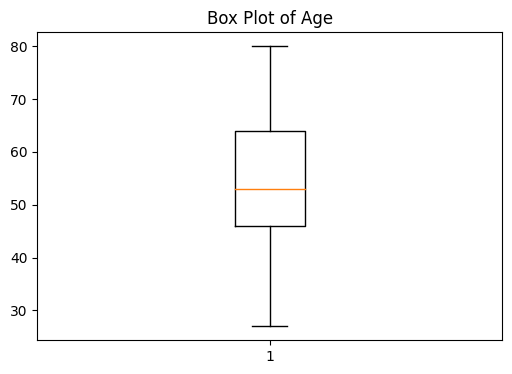

In [200]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Age'])
plt.title('Box Plot of Age')
plt.show()

In [145]:
df[df['Age']>80]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Enrollment_Age
190,Mid Education,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0,123,10
237,Mid Education,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,130,9
335,High Education,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,124,10
417,High Education,Married,93027.0,0,0,2013-04-13,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0,82,10
1804,High Education,Single,51141.0,0,0,2013-07-08,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0,83,10


In [146]:
len(df[df['Age']>80])/df.shape[0]*100

0.24319066147859922

Median umur penduduk di US adalah 38.9 (source: https://www.census.gov/newsroom/press-releases/2023/population-estimates-characteristics.html#:~:text=JUNE%2022%2C%202023%20%E2%80%94%20The%20nation's,of%20the%20population%20is%20younger.). Data outliers Age ada pada umur diatas 120 yang tidak masuk akal. Kemudian, data outliers Age dari keseluruhan entry data adalah sebesar 0.25%. Sehingga, untuk outliers Age dapat di drop saja.

In [147]:
df.drop(df[df['Age']>80].index, inplace=True)
df = df.reset_index(drop=True)

In [148]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2051, 27)


,dataFeatures,dataType,null,unique,uniqueSample
0,Education,object,0,3,"[High Education, Low Education]"
1,Marital_Status,object,0,5,"[Single, Divorced]"
2,Income,float64,0,1969,"[53083.0, 48192.0]"
3,Kidhome,int64,0,3,"[1, 0]"
4,Teenhome,int64,0,3,"[2, 0]"
5,Dt_Customer,datetime64[ns],0,663,"[2013-03-20T00:00:00.000000000, 2012-09-29T00:..."
6,Recency,int64,0,100,"[42, 66]"
7,MntWines,int64,0,775,"[11, 779]"
8,MntFruits,int64,0,158,"[65, 16]"
9,MntMeatProducts,int64,0,556,"[413, 154]"


# Data Analysis

Setelah dilakukan data cleaning, kita dapat masuk ke tahap analisis. Analisis yang dilakukan didasari dari education level, income level, dan age range. Dilakukan analisis berdasarkan parameter tersebut agar mempermudah target customer dan konten marketing yang efektif untuk target customer dengan klasifikasi tersebut.

# Analisis Spending Berdasarkan Education Level

In [149]:
education_counts = df['Education'].value_counts()
print("Frequency of Education Levels:")
print(education_counts)

education_summary = df['Education'].describe()
print("\nSummary Statistics for Education:")
print(education_summary)

education_percentage = (education_counts / len(df)) * 100
print("\nPercentage of Education Levels:")
print(education_percentage)

Frequency of Education Levels:
Education
Mid Education     1555
High Education     447
Low Education       49
Name: count, dtype: int64

Summary Statistics for Education:
count              2051
unique                3
top       Mid Education
freq               1555
Name: Education, dtype: object

Percentage of Education Levels:
Education
Mid Education     75.816675
High Education    21.794247
Low Education      2.389078
Name: count, dtype: float64


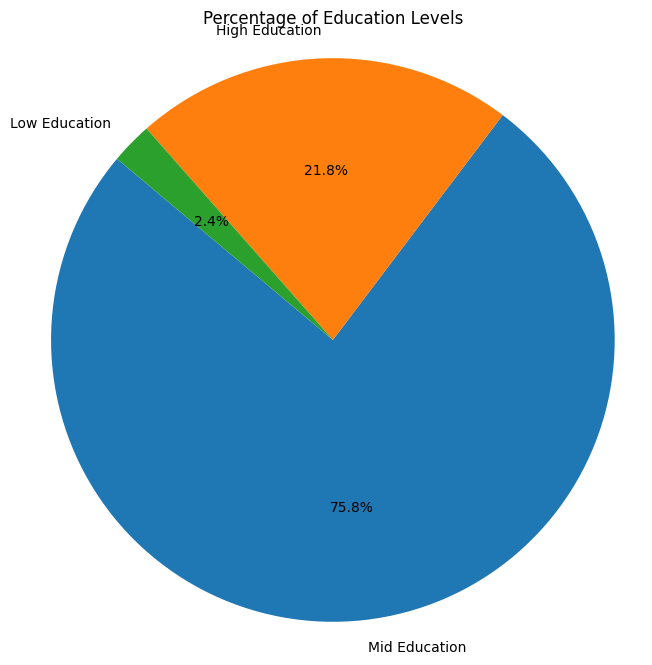

<Figure size 640x480 with 0 Axes>

In [150]:
education_levels = education_percentage.index
education_percentages = education_percentage.values
plt.figure(figsize=(8, 8))
plt.pie(education_percentages, labels=education_levels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Education Levels')
plt.axis('equal')
plt.show()
plt.savefig('education_pie_chart.png')

Dapat dilihat bahwa bauran education level dari supermarket customers tersebut memiliki Mid-Education dengan bauran 75.8% diikuti dengan High-Education sebanyak 21.79%, dan paling rendah merupakan Low-Education dengan bauran 2.38%

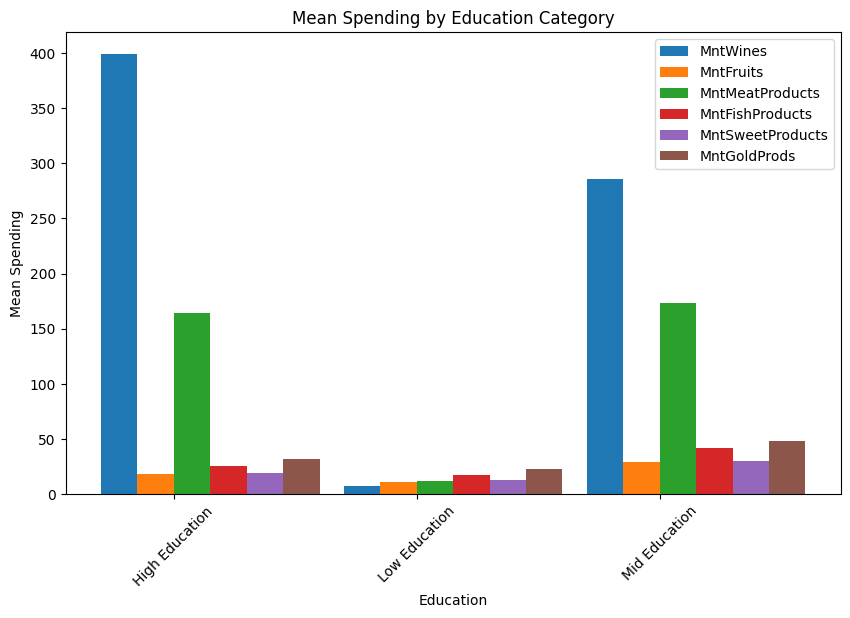

<Figure size 640x480 with 0 Axes>

In [151]:
demografi_education = df.groupby('Education')

education_summary = demografi_education[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

education_summary = education_summary.reset_index()

width = 0.15
num_categories = len(education_summary)

positions = range(num_categories)

columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, ax = plt.subplots(figsize=(10, 6))

for i, column in enumerate(columns_to_plot):
    x = [pos + width * i for pos in positions]
    ax.bar(x, education_summary[column], width=width, label=column)

ax.set_xticks([pos + width * (num_categories / 2) for pos in positions])
ax.set_xticklabels(education_summary['Education'])

ax.set_xlabel('Education')
ax.set_ylabel('Mean Spending')
ax.set_title('Mean Spending by Education Category')

ax.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()
plt.savefig('Mean_Spending_Education.png')

Dapat dilihat dari tabel diatas bahwa customers dengan High & Mid-Education level memiliki kecenderungan untuk spending terhadap wine lebih besar dengan perbandingan lebih besar customer dengan High-Education dibandingkan customers dengan Mid-Education

In [152]:
demografi_education = df.groupby('Education')
education_summary = demografi_education[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

mid_education_summary = education_summary.loc['Mid Education']

sorted_mid_education_summary = mid_education_summary.sort_values(ascending=False)

print(sorted_mid_education_summary)

MntWines            285.907395
MntMeatProducts     173.539550
MntGoldProds         47.917685
MntFishProducts      41.455305
MntSweetProducts     29.888746
MntFruits            28.904180
Name: Mid Education, dtype: float64


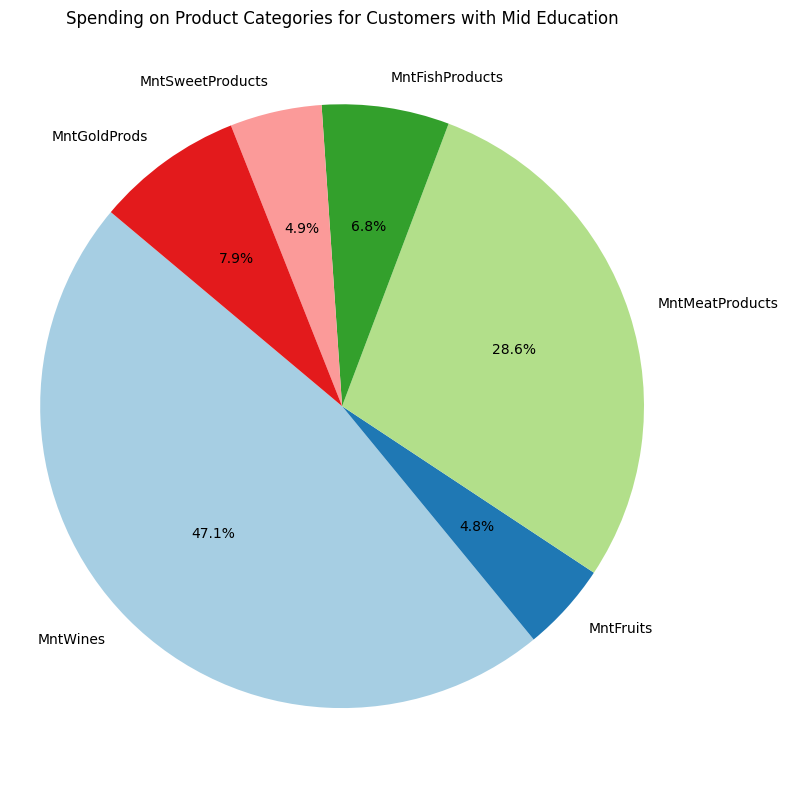

<Figure size 640x480 with 0 Axes>

In [153]:
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

spending_values = sorted_mid_education_summary[categories]

plt.figure(figsize=(8, 8))
plt.pie(spending_values, labels=categories, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(categories))))

plt.title('Spending on Product Categories for Customers with Mid Education')

plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('education_spending_pie_chart.png')

Karena sebagian besar customer memiliki education level Mid-Education, maka kita akan fokus kepada customer dengan Mid-Education (Sarjana dan Masters degree). Dapat dilihat dari data diatas bahwa produk wines memiliki bauran 47.1% diikuti dengan produk meat dengan 28.6% dari keseluruhan spending pada customers dengan Mid-Education level.

Analisis efektifitas campaign yang telah dilakukan oleh supermarket berdasarkan education level

In [154]:
mid_education_df = df[df['Education'] == 'Mid Education']

num_deals_statistics = mid_education_df['NumDealsPurchases'].describe()

num_deals_statistics

count    1555.000000
mean        2.331833
std         1.906227
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

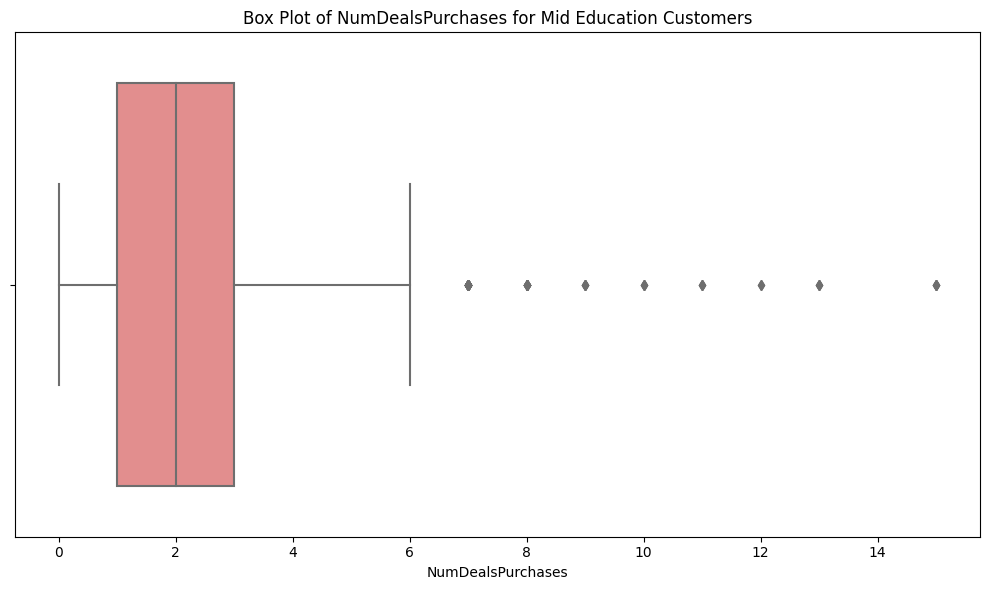

<Figure size 640x480 with 0 Axes>

In [155]:
mid_education_df = df[df['Education'] == 'Mid Education']

plt.figure(figsize=(10, 6))
sns.boxplot(x='NumDealsPurchases', data=mid_education_df, color='lightcoral')
plt.title('Box Plot of NumDealsPurchases for Mid Education Customers')
plt.xlabel('NumDealsPurchases')

plt.tight_layout()
plt.show()

plt.savefig('mideducation_numdealspurchases.png')

Dari graph diatas dapat dilihat bahwa Mean dari pembelian yang disertakan dengan diskon ada pada angka 2.33. Dari Median 2, dapat diartikan bahwa kurang lebih ada 2 kali pembelian yang disertai diskon untuk mid-Education.

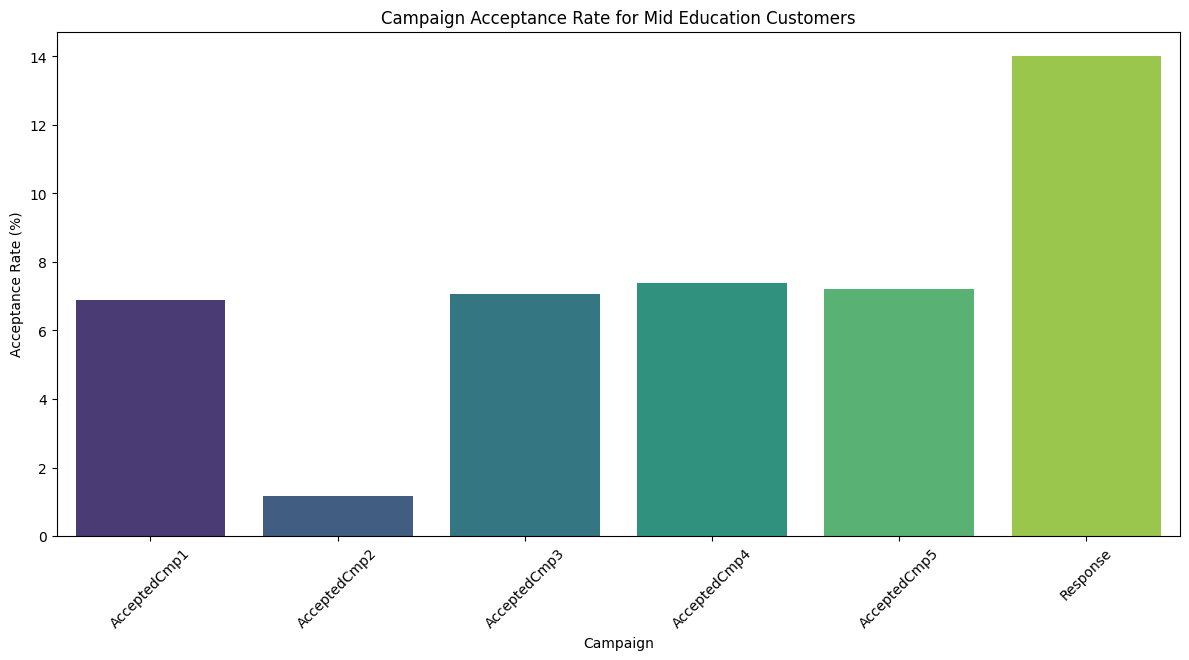

<Figure size 640x480 with 0 Axes>

In [156]:
mid_education_df = df[df['Education'] == 'Mid Education']

campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_acceptance_rate = (mid_education_df[campaigns].mean())*100

plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_acceptance_rate.index, y=campaign_acceptance_rate.values, palette='viridis')
plt.title('Campaign Acceptance Rate for Mid Education Customers')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate (%)')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
plt.savefig('education_campaign_acceptancerate.png')

Dapat dilihat dari customers dengan Mid-Education memiliki acceptance rate 14% (tertinggi dibandingkan dengan campaign lainnya) pada campaign response (terakhir). Hal ini menunjukkan bahwa konten dari campaign terakhir dapat diaplikasikan kedepannya dan lebih difokuskan ke orang dengan mid-education agar lebih efektif lagi.

Berikutnya, relasi channel penjualan supermarket terhadap mid-education level customers akan dianalisis

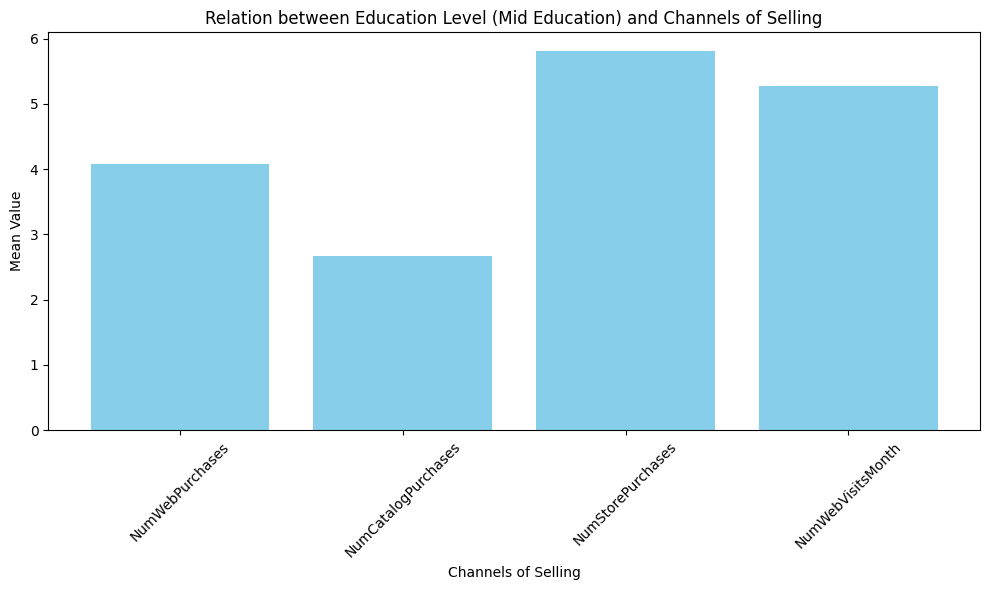

<Figure size 640x480 with 0 Axes>

In [157]:
mid_education_df = df[df['Education'] == 'Mid Education']

education_channels = mid_education_df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].mean()

plt.figure(figsize=(10, 6))
plt.bar(education_channels.index, education_channels.values, color='skyblue')
plt.xlabel('Channels of Selling')
plt.ylabel('Mean Value')
plt.title('Relation between Education Level (Mid Education) and Channels of Selling')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
plt.savefig('education_sellingchannels.png')

In [158]:
mean_web_visits = mid_education_df['NumWebVisitsMonth'].mean()
mean_web_purchases = mid_education_df['NumWebPurchases'].mean()

percentage_difference = ((mean_web_visits - mean_web_purchases) / mean_web_purchases) * 100
print(f"Percentage Difference between NumWebVisitsMonth and NumWebPurchases (Mid Education): {percentage_difference:.2f}%")


Percentage Difference between NumWebVisitsMonth and NumWebPurchases (Mid Education): 29.48%


Dapat dilihat dari graph diatas bahwa customers dengan mid-education lebih banyak mengunjungi toko secara langsung untuk melakukan pembelian di supermarket. Namun, pembelian melalui web masih lebih rendah dibandingkan dengan mengunjungi toko secara langsung. Terdapat 29.48% customers pada mid education yang hanya mengunjungi web secara online dan tidak membeli. Oleh karena itu, pada promosi dapat dilakukan campaign untuk melakukan belanja secara online karena ini menjadi potensi kedepannya agar memiliki unique selling point dibandingkan dengan supermarket yang lainnya.

Dikarenakan bauran eduaction level pada supermarket customers terbesar adalah pada Mid Education dengan 75.8%, maka fokus utama bisa diarahkan pada customers dengan education level tersebut. Mid Education adalah customers dengan lulusan bachelors dan masters. Penjualan terbesar adalah pada produk wines dan meat, sedangkan untuk campaign paling efektif adalah campaign terakhir untuk Mid Education. Oleh karena itu, supermarket dapat memfokuskan campaign berikutnya dengan konten yang similar dengan campaign terakhir, dikhususkan untuk orang dengan Mid Education dengan konten produk wines dan meat agar lebih banyak customers dapat spending pada produk tersebut. Customers dengan Mid Education memiliki kecenderungan untuk tetap membeli barang dari toko secara langsung, dengan adanya web dari supermarket dan online selling, Supermarket dapat memanfaatkan ini dengan cara melakukan konten campaign yang similar dari campaign terakhir, ditujukan untuk Mid Education, dengan produk yang ditawarkan wines dan meat, dan menawarkan pembelian melalui online agar supermarket dapat lebih unggul dari supermarket lainnya karena memiliki unique selling point.

# Analisis Spending Berdasarkan Income

Menurut Frankenfield (2023), berikut adalah klasifikasi middle-income di USA: 
- Single household (tidak memiliki pasangan dan anak) middle-income class income tahunan 30,000 - 90,000 USD. 
- Couple, household 2 orang (diasumsikan baik together maupun married) middle-class income adalah 42,430 - 127,300 USD.
- Household 3 orang memiliki range 60,000 - 180,000 USD
- Household 4 orang memiliki range 67,100 - 201,270 USD
- Household 5 orang memiliki range 76,000 - 210,000 USD
- (source: https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx#toc-what-is-the-middle-class)

Dibawah dari data klasifikasi middle-income diatas merupakan low-income, dan diatas data tersebut merupakan high-income. Oleh karena itu, data perlu di grouping berdasarkan martial_status dan jumlah anak agar dapat diklasifikasikan berdasarkan incomenya.

Membuat kolom Total Children dengan menjumlahkan Kidhome dan Teenhome

In [159]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

Dikarenakan ada data Marital_Status yang single dan memiliki data Kidhome atau Teenhome, maka diasumsikan sudah memiliki anak dan tidak memiliki pasangan. Oleh karena itu, perlu dilakukan perhitungan Household_Size untuk menghitung jumlah orang dalam rumah

In [160]:
def calculate_household_size(row):
    if row['Marital_Status'] in ['Single', 'Divorced', 'Other']:
        return 1 + row['Total_Children']
    else:
        return 2 + row['Total_Children']

df['Household_Size'] = df.apply(calculate_household_size, axis=1)

Kemudian, dilakukan klasifikasi income berdasarkan Household_Size berdasarkan conditions yang telah di-specify diatas

In [161]:
def categorize_income(row):
    if row['Household_Size'] == 1:
        if row['Income'] < 30000:
            return 'Low-Income'
        elif 30000 <= row['Income'] <= 90000:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 2:
        if row['Income'] < 42430:
            return 'Low-Income'
        elif 42430 <= row['Income'] <= 127300:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 3:
        if row['Income'] < 60000:
            return 'Low-Income'
        elif 60000 <= row['Income'] <= 180000:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 4:
        if row['Income'] < 67100:
            return 'Low-Income'
        elif 67100 <= row['Income'] <= 201270:
            return 'Middle-Income'
        else:
            return 'High-Income'
    elif row['Household_Size'] == 5:
        if row['Income'] < 76000:
            return 'Low-Income'
        elif 76000 <= row['Income'] <= 210000:
            return 'Middle-Income'
        else:
            return 'High-Income'
    else:
        return 'Unknown'

df['income_class'] = df.apply(categorize_income, axis=1)

In [162]:
incomelevel_counts = df['income_class'].value_counts()
print("Frequency of income classes:")
print(incomelevel_counts)

incomelevel_summary = df['income_class'].describe()
print("\nSummary Statistics for income classes:")
print(incomelevel_summary)

incomelevel_percentage = (incomelevel_counts / len(df)) * 100
print("\nPercentage of income classes:")
print(incomelevel_percentage)

Frequency of income classes:
income_class
Low-Income       1131
Middle-Income     895
High-Income        25
Name: count, dtype: int64

Summary Statistics for income classes:
count           2051
unique             3
top       Low-Income
freq            1131
Name: income_class, dtype: object

Percentage of income classes:
income_class
Low-Income       55.143832
Middle-Income    43.637250
High-Income       1.218918
Name: count, dtype: float64


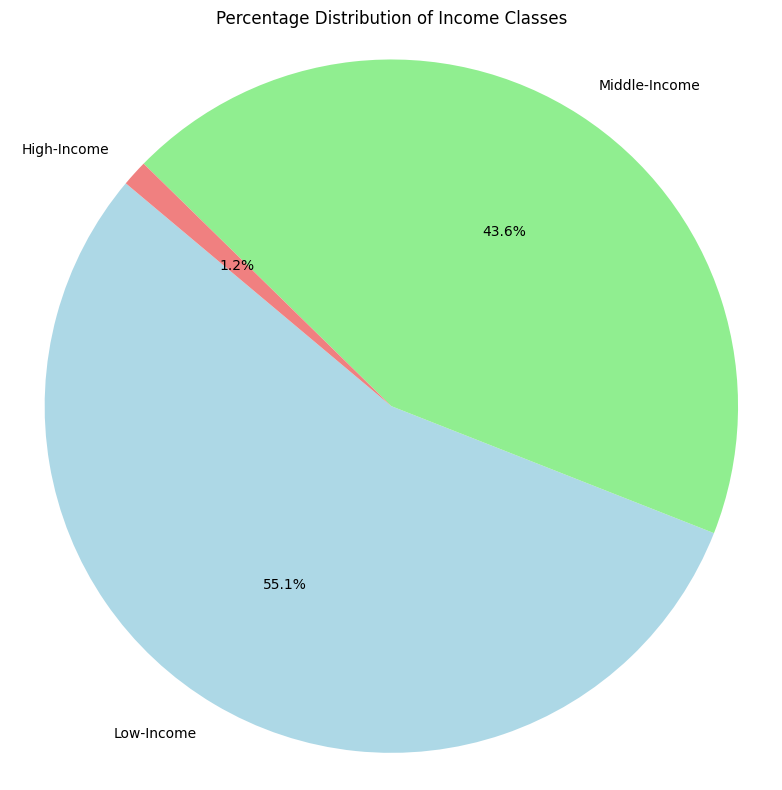

<Figure size 640x480 with 0 Axes>

In [163]:
labels = incomelevel_percentage.index

sizes = incomelevel_percentage.values

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Percentage Distribution of Income Classes')

plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('incomelevel_pie_chart.png')

Dapat dilihat dari summary statistics diatas bahwa supermarket customers income level terbesar adalah pada Low-Income dengan bauran 55.14% diikuti dengan Middle-Income level dengan bauran 43.64%, sedangkan customers dengan high-income memiliki bauran paling sedikit yaitu 1.21%. Oleh karena itu, fokus analisis dapat ditujukan kepada customers dengan Low-Income dan Mid-Income.

Setelah dilakukan klasifikasi income-level berdasarkan household size, analisis hubungan antara income level dan produk yang dibeli di supermarket dapat dilakukan

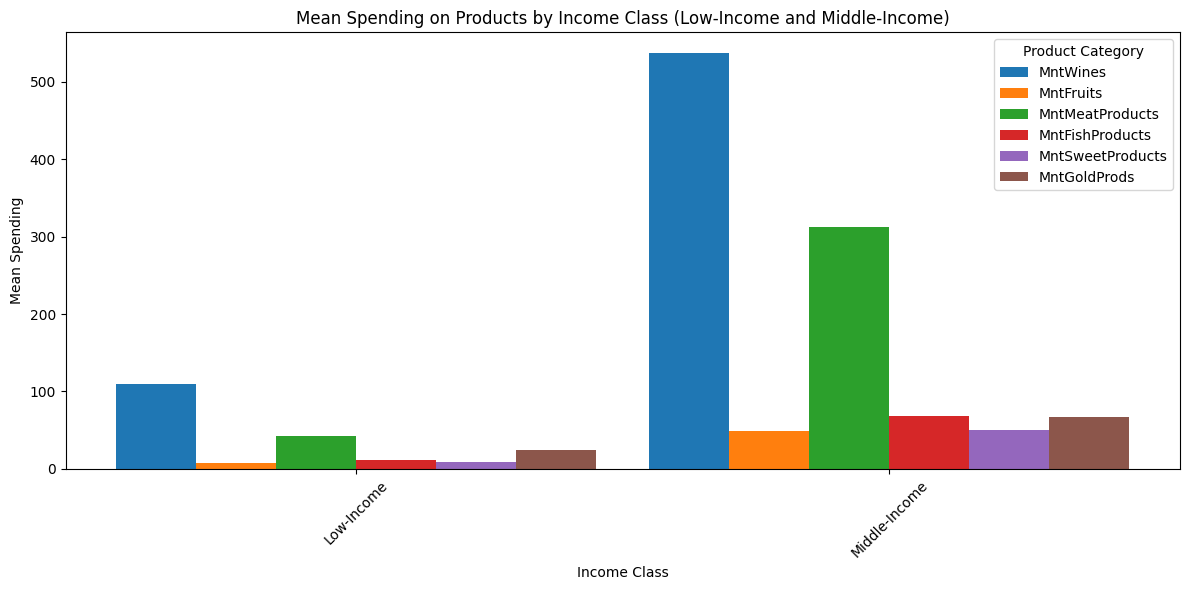

<Figure size 640x480 with 0 Axes>

In [164]:
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

income_product_summary = df.groupby(['income_class'])[product_categories].mean()

filtered_income_summary = income_product_summary.loc[['Low-Income', 'Middle-Income']]

product_categories = filtered_income_summary.columns

bar_width = 0.15
positions = np.arange(len(filtered_income_summary))

fig, ax = plt.subplots(figsize=(12, 6))

for i, category in enumerate(product_categories):
    ax.bar(positions + i * bar_width, filtered_income_summary[category], width=bar_width, label=category)

ax.set_xticks(positions + (len(product_categories) - 1) * bar_width / 2)
ax.set_xticklabels(filtered_income_summary.index)
plt.title('Mean Spending on Products by Income Class (Low-Income and Middle-Income)')
plt.xlabel('Income Class')
plt.ylabel('Mean Spending')
plt.legend(title='Product Category', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('income_spending_mean.png')

In [165]:
mean_spending_wines_low_income = filtered_income_summary.loc['Low-Income', 'MntWines']
mean_spending_meat_low_income = filtered_income_summary.loc['Low-Income', 'MntMeatProducts']

mean_spending_wines_middle_income = filtered_income_summary.loc['Middle-Income', 'MntWines']
mean_spending_meat_middle_income = filtered_income_summary.loc['Middle-Income', 'MntMeatProducts']

percentage_difference_low_income = ((mean_spending_wines_low_income - mean_spending_meat_low_income) / mean_spending_meat_low_income) * 100

percentage_difference_middle_income = ((mean_spending_wines_middle_income - mean_spending_meat_middle_income) / mean_spending_meat_middle_income) * 100

print(f"Percentage Difference in spending on wines compared to meat (Low-Income): {percentage_difference_low_income:.2f}%")
print(f"Percentage Difference in spending on wines compared to meat (Middle-Income): {percentage_difference_middle_income:.2f}%")

Percentage Difference in spending on wines compared to meat (Low-Income): 156.54%
Percentage Difference in spending on wines compared to meat (Middle-Income): 71.91%


Dapat dilihat dari graph rata-rata spending customers diatas bahwa pada middle-income dan low-income, customers banyak menggunakan uang mereka untuk membeli wines dan diikuti dengan meat products. Pada low income, wines lebih besar 156.54% dan pada middle income wines lebih besar 71.91%.

In [166]:
sorted_income_summary = filtered_income_summary.T.sort_values(['Low-Income', 'Middle-Income'], ascending=False)

rankings = sorted_income_summary.rank(ascending=False)
print(rankings)

income_class      Low-Income  Middle-Income
MntWines                 1.0            1.0
MntMeatProducts          2.0            2.0
MntGoldProds             3.0            4.0
MntFishProducts          4.0            3.0
MntSweetProducts         5.0            5.0
MntFruits                6.0            6.0


Rank diatas adalah ranking penjualan untuk customers dengan low-income dan middle-income. Dapat dilihat bahwa untuk Low-Income, urutan customers spendingnya adalah Wines, Meat, Gold, Fish, Sweets, dan Fruits.

Menentukan seberapa efektif discount berdasarkan income-level dari customers:

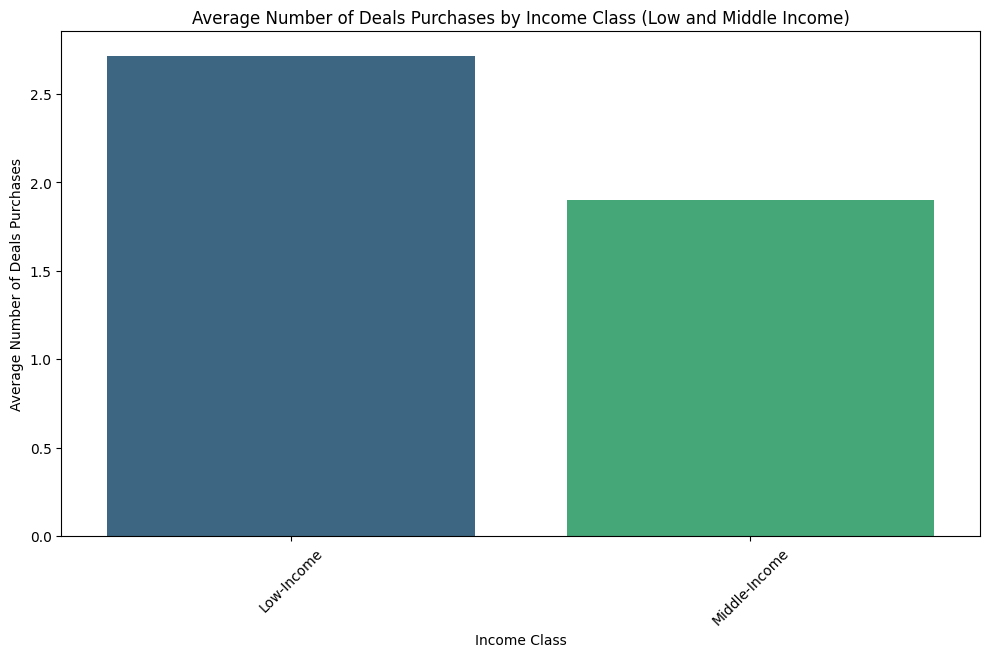

<Figure size 640x480 with 0 Axes>

In [167]:
filtered_df = df[df['income_class'].isin(['Low-Income', 'Middle-Income'])]

average_num_deals_by_income = filtered_df.groupby('income_class')['NumDealsPurchases'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='income_class', y='NumDealsPurchases', data=average_num_deals_by_income, palette='viridis')
plt.title('Average Number of Deals Purchases by Income Class (Low and Middle Income)')
plt.xlabel('Income Class')
plt.ylabel('Average Number of Deals Purchases')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
plt.savefig('income_averange_numofdeals.png')

In [168]:
middle_income_avg = average_num_deals_by_income.loc[average_num_deals_by_income['income_class'] == 'Middle-Income', 'NumDealsPurchases'].iloc[0]
low_income_avg = average_num_deals_by_income.loc[average_num_deals_by_income['income_class'] == 'Low-Income', 'NumDealsPurchases'].iloc[0]

percentage_difference = ((middle_income_avg - low_income_avg) / low_income_avg) * 100

# Print the percentage difference
print(f"Percentage Difference in Average Number of Deals Purchases (Middle-Income vs. Low-Income): {percentage_difference:.2f}%")

Percentage Difference in Average Number of Deals Purchases (Middle-Income vs. Low-Income): -30.16%


Dapat dilihat dari graph diatas bahwa customers dengan Low-Income memiliki kecenderungan yang tinggi jika dibandingkan dengan income level lainnya untuk membeli produk apabila ada discount. Oleh karena itu, produk wines; meat; dan gold product yang merupakan top 3 product paling laku untuk low income dapat difokuskan apabila supermarket hendak melakukan discount. Low-income customers memiliki kecenderungan 30.16% lebih untuk membeli apabila ada discount jika dibandingkan dengan mid-income customers.

Menentukan campaign mana yang efektif berdasarkan income level

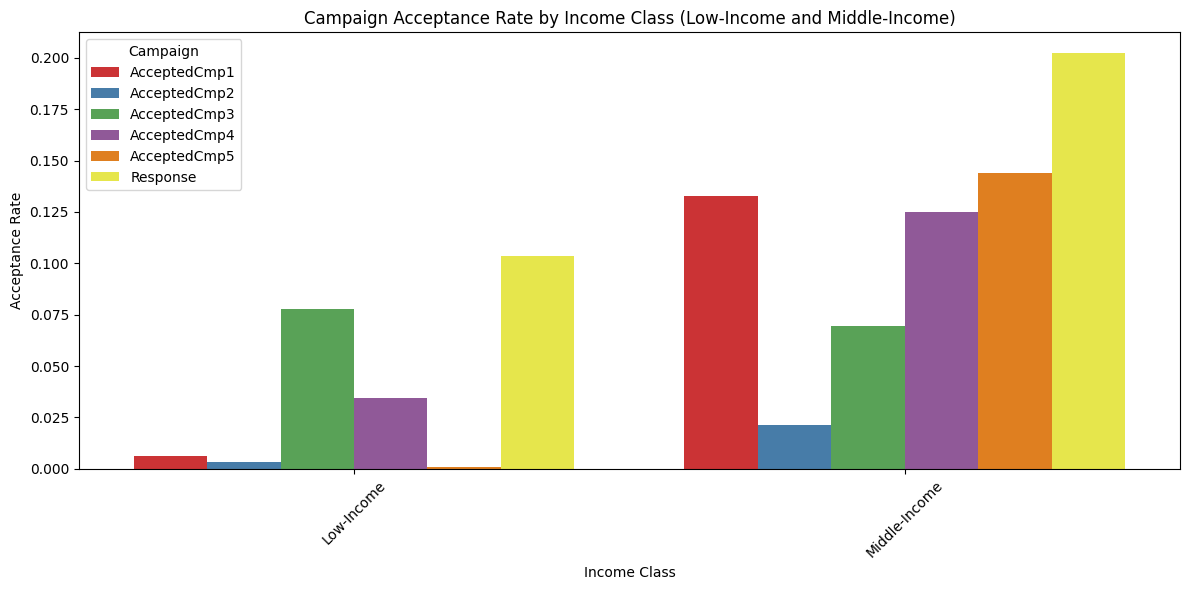

<Figure size 640x480 with 0 Axes>

In [169]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

acceptance_rates_by_income = df.groupby('income_class')[campaign_columns].mean().reset_index()

acceptance_rates_by_income = acceptance_rates_by_income.melt(id_vars=['income_class'], var_name='Campaign', value_name='Acceptance Rate')

filtered_acceptance_rates = acceptance_rates_by_income[acceptance_rates_by_income['income_class'].isin(['Low-Income', 'Middle-Income'])]

plt.figure(figsize=(12, 6))
sns.barplot(x='income_class', y='Acceptance Rate', hue='Campaign', data=filtered_acceptance_rates, palette='Set1')
plt.title('Campaign Acceptance Rate by Income Class (Low-Income and Middle-Income)')
plt.xlabel('Income Class')
plt.ylabel('Acceptance Rate')
plt.legend(title='Campaign', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
plt.savefig('income_campaign_acceptancerate.png')

In [188]:
for index, row in filtered_acceptance_rates.iterrows():
    income_class = row['income_class']
    campaign = row['Campaign']
    acceptance_rate = row['Acceptance Rate']
    
    print(f"Income Class: {income_class}, Campaign: {campaign}, Acceptance Rate: {acceptance_rate:.2f}")

Income Class: Low-Income, Campaign: AcceptedCmp1, Acceptance Rate: 0.01
Income Class: Middle-Income, Campaign: AcceptedCmp1, Acceptance Rate: 0.13
Income Class: Low-Income, Campaign: AcceptedCmp2, Acceptance Rate: 0.00
Income Class: Middle-Income, Campaign: AcceptedCmp2, Acceptance Rate: 0.02
Income Class: Low-Income, Campaign: AcceptedCmp3, Acceptance Rate: 0.08
Income Class: Middle-Income, Campaign: AcceptedCmp3, Acceptance Rate: 0.07
Income Class: Low-Income, Campaign: AcceptedCmp4, Acceptance Rate: 0.03
Income Class: Middle-Income, Campaign: AcceptedCmp4, Acceptance Rate: 0.13
Income Class: Low-Income, Campaign: AcceptedCmp5, Acceptance Rate: 0.00
Income Class: Middle-Income, Campaign: AcceptedCmp5, Acceptance Rate: 0.14
Income Class: Low-Income, Campaign: Response, Acceptance Rate: 0.10
Income Class: Middle-Income, Campaign: Response, Acceptance Rate: 0.20


Dapat dilihat dari graph diatas bahwauntuk middle income dan low income, acceptance rate terhadap income yang paling tinggi adalah campaign yang terakhir dengan acceptance rate 10% untuk lowincome dan 20% untuk midincome.

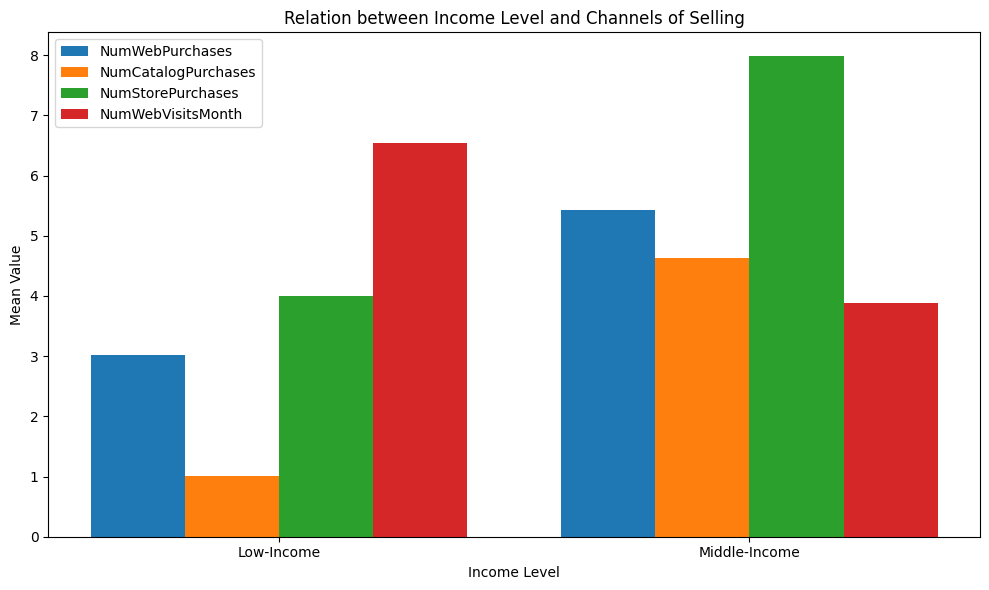

<Figure size 640x480 with 0 Axes>

In [170]:
education_channels = df.groupby('income_class')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].mean()

education_channels.reset_index(inplace=True)

filtered_education_channels = education_channels[education_channels['income_class'].isin(['Low-Income', 'Middle-Income'])]

fig, ax = plt.subplots(figsize=(10, 6))

num_bars = len(filtered_education_channels)
bar_width = 0.2
index = range(num_bars)

plt.bar(index, filtered_education_channels['NumWebPurchases'], bar_width, label='NumWebPurchases')
plt.bar([i + bar_width for i in index], filtered_education_channels['NumCatalogPurchases'], bar_width, label='NumCatalogPurchases')
plt.bar([i + 2 * bar_width for i in index], filtered_education_channels['NumStorePurchases'], bar_width, label='NumStorePurchases')
plt.bar([i + 3 * bar_width for i in index], filtered_education_channels['NumWebVisitsMonth'], bar_width, label='NumWebVisitsMonth')

plt.xlabel('Income Level')
plt.ylabel('Mean Value')
plt.title('Relation between Income Level and Channels of Selling')
plt.xticks([i + 1.5 * bar_width for i in index], filtered_education_channels['income_class'])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
plt.savefig('income_campaign_sellingchannels.png')

In [189]:
mean_web_visits_low_income = filtered_education_channels.loc[filtered_education_channels['income_class'] == 'Low-Income', 'NumWebVisitsMonth'].iloc[0]
mean_web_purchases_low_income = filtered_education_channels.loc[filtered_education_channels['income_class'] == 'Low-Income', 'NumWebPurchases'].iloc[0]

mean_web_visits_middle_income = filtered_education_channels.loc[filtered_education_channels['income_class'] == 'Middle-Income', 'NumWebVisitsMonth'].iloc[0]
mean_web_purchases_middle_income = filtered_education_channels.loc[filtered_education_channels['income_class'] == 'Middle-Income', 'NumWebPurchases'].iloc[0]

percentage_difference_low_income = ((mean_web_visits_low_income - mean_web_purchases_low_income) / mean_web_purchases_low_income) * 100
percentage_difference_middle_income = ((mean_web_visits_middle_income - mean_web_purchases_middle_income) / mean_web_purchases_middle_income) * 100

print(f"Percentage Difference in WebVisits and WebPurchases (Low-Income): {percentage_difference_low_income:.2f}%")
print(f"Percentage Difference in WebVisits and WebPurchases (Middle-Income): {percentage_difference_middle_income:.2f}%")

Percentage Difference in WebVisits and WebPurchases (Low-Income): 115.95%
Percentage Difference in WebVisits and WebPurchases (Middle-Income): -28.24%


Dapat dilihat dari graph diatas bahwa untuk Low-Income level, customers lebih banyak mengunjungi web online dibandingkan dengan mid-income lainnya, sedangkan untuk middle-income customers banyak mengunjungi toko secara langsung dan diikuti dengan pembelian melalui web. Pada low income, sebanyak 115.95% perbedaan dari orang yang membeli melalui web dan web visit. Sedangkan untuk middleincome terdapat 28.24% dari orang yang melakukan web visit dan pembelian secara web.

## Analisis berdasarkan Age

Klasifikasi Age dibagi menjadi 3:
- 20-40 (Millennials)
- 40-60 (Gen X)
- diatas 60 (Baby Boomers)
- source: 
https://www.dailymail.co.uk/femail/article-8109077/Which-generation-fall-into.html

Untuk mempermudah analisis, dibuat kolom Age_Range berdasarkan klasifikasi diatas.

In [171]:
df['Age'].describe()

count    2051.000000
mean       54.094100
std        11.634869
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max        80.000000
Name: Age, dtype: float64

In [172]:
age_bins1 = [20, 40, 60, float('inf')]
age_labels1 = ['Millennials', 'Gen X', 'Baby Boomers']

df['Age_Range'] = pd.cut(df['Age'], bins=age_bins1, labels=age_labels1)


Kemudian kita dapat melihat distribusi data dari Age_Range

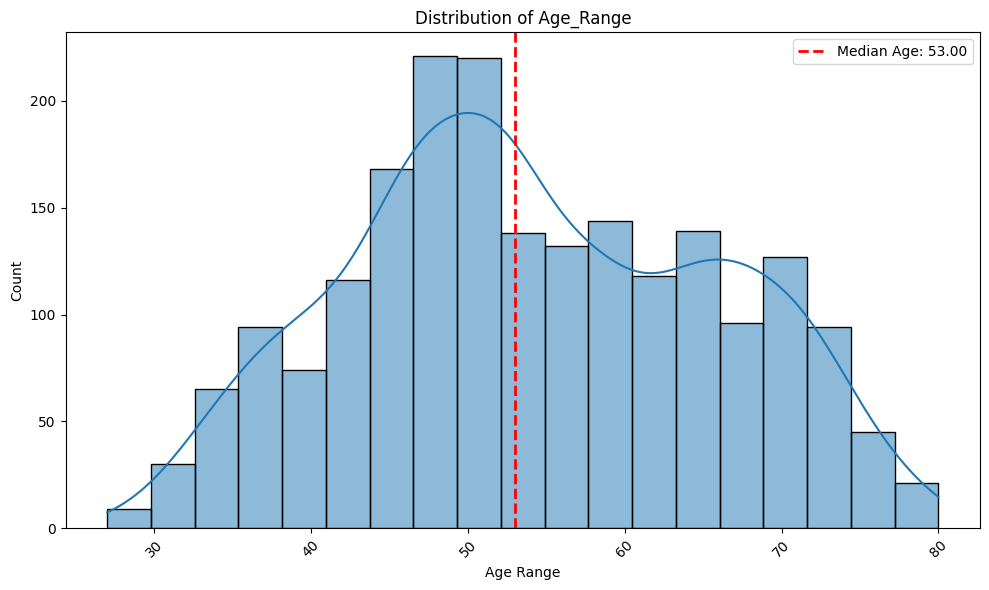

In [173]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df['Age'], kde=True)
plt.title('Distribution of Age_Range')
plt.xlabel('Age Range')
plt.ylabel('Count')

median_age = df['Age'].median()
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=2, label=f'Median Age: {median_age:.2f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

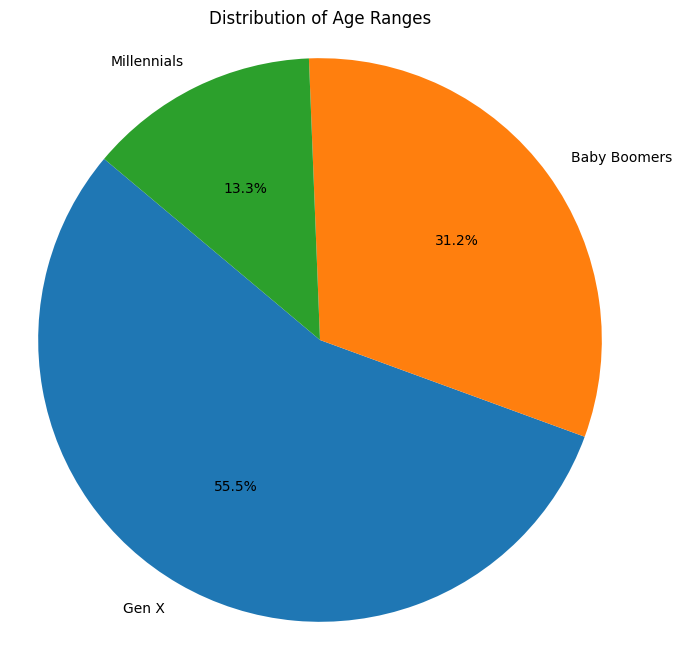

<Figure size 640x480 with 0 Axes>

In [174]:
age_range_counts = df['Age_Range'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Ranges')
plt.axis('equal')
plt.show()
plt.savefig('agerange_pie_chart.png')

Dari Distribusi data Age, dapat dilihat bahwa distribusi age pada customers mostly pada umur 40 - 70. Untuk itu mari kita analisis lebih dalam melalui Age_Range

Kemudian, visualisasi hubungan antara Age_Range dan spending product di supermarket

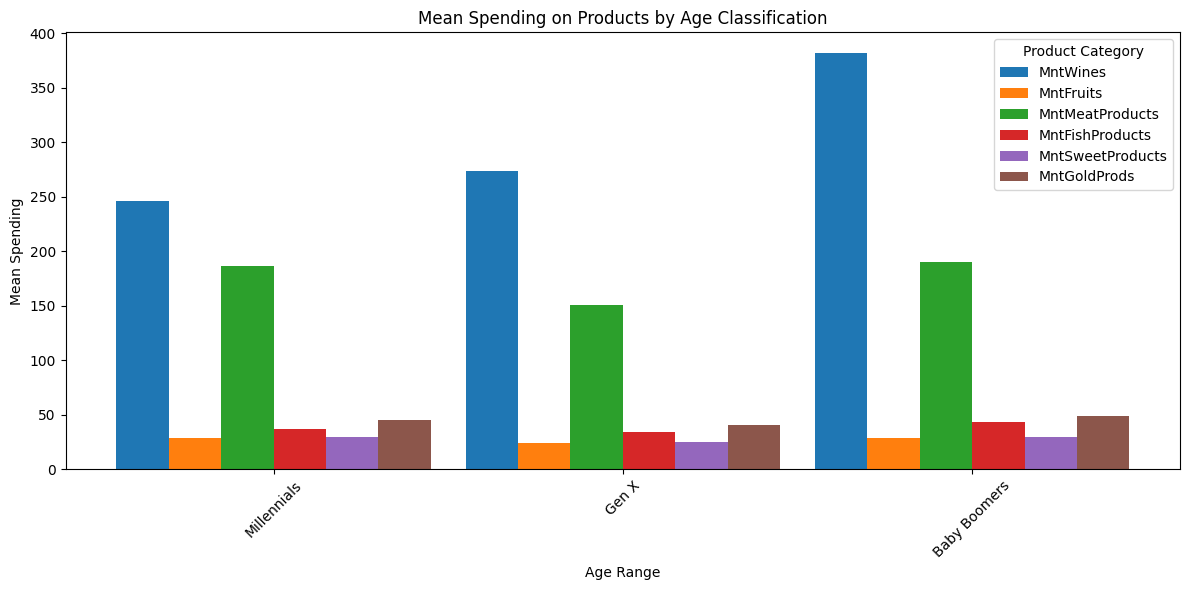

<Figure size 640x480 with 0 Axes>

In [192]:
age_product_summary = df.groupby('Age_Range')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

product_categories = age_product_summary.columns

bar_width = 0.15
positions = np.arange(len(age_product_summary))

fig, ax = plt.subplots(figsize=(12, 6))

for i, category in enumerate(product_categories):
    ax.bar(positions + i * bar_width, age_product_summary[category], width=bar_width, label=category)

ax.set_xticks(positions + (len(product_categories) - 1) * bar_width / 2)
ax.set_xticklabels(age_product_summary.index)
plt.title('Mean Spending on Products by Age Classification')
plt.xlabel('Age Range')
plt.ylabel('Mean Spending')
plt.legend(title='Product Category', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
plt.savefig('agerange_spendingproducts.png')

In [191]:
mean_wines_by_age = age_product_summary['MntWines']
mean_meat_by_age = age_product_summary['MntMeatProducts']

percentage_difference = ((mean_wines_by_age - mean_meat_by_age) / mean_meat_by_age) * 100

for age_range, percentage in zip(age_product_summary.index, percentage_difference):
    print(f"Age Range: {age_range}, Percentage Difference (Wines vs. Meat): {percentage:.2f}%")

Age Range: Millennials, Percentage Difference (Wines vs. Meat): 31.97%
Age Range: Gen X, Percentage Difference (Wines vs. Meat): 81.83%
Age Range: Baby Boomers, Percentage Difference (Wines vs. Meat): 101.09%


Dapat dilihat dari graph diatas bahwa secara keseluruhan, customers lebih banyak spending pada product Wines dan Meat. Untuk trend spendingnya sendiri dapat dilihat bahwa perbedaan spend terhadap wines dan meat paling besar terletak pada Baby Boomers dengan perbedaan sejumlah 101.09% dan perbedaan terkecil pada millennials dengan perbedaan 31.97%. Porsi Age Gen X pada customers lebih besar, sehingga urutan prioritas fokus supermarket lebih baik ditujukan pada Gen X, Baby Boomers, dan Millennials.

Berikut adalah analisis pengaruh discount pada pembelian berdasarkan klasifikasi umur

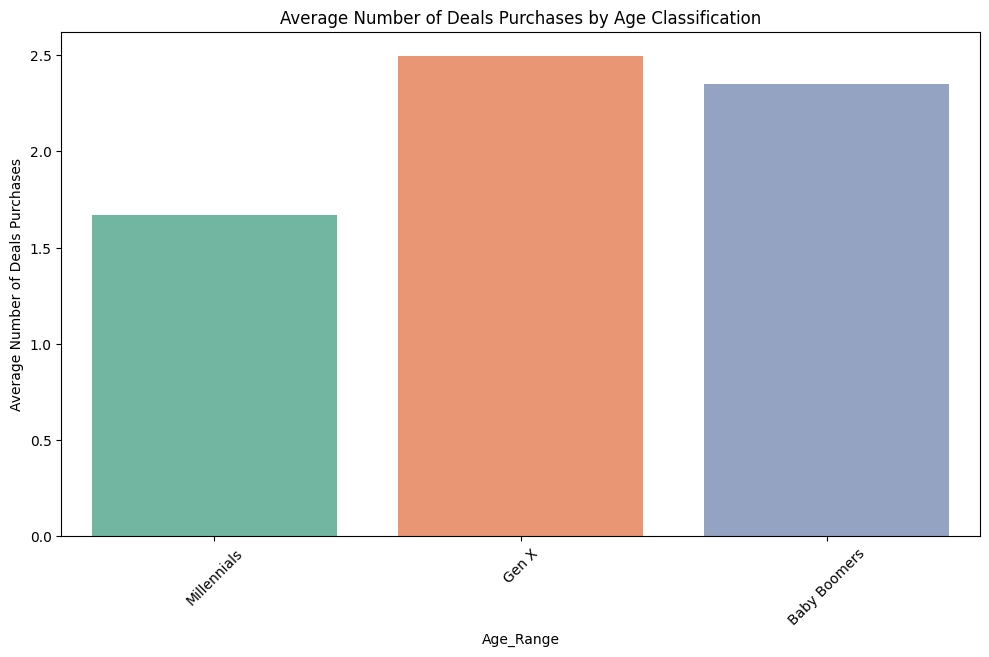

<Figure size 640x480 with 0 Axes>

In [193]:
average_num_deals_by_age = df.groupby('Age_Range')['NumDealsPurchases'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Range', y='NumDealsPurchases', data=average_num_deals_by_age, palette='Set2')
plt.title('Average Number of Deals Purchases by Age Classification')
plt.xlabel('Age_Range')
plt.ylabel('Average Number of Deals Purchases')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
plt.savefig('agerange_numdealspurchases.png')

Dapat dilihat dari graph diatas bahwa range umur customer 45-55 memiliki kecenderungan paling tinggi apabila product yang ditawarkan memiliki discount. Sedangkan untuk yang paling rendah terletak pada range umur diatas 75 tahun. Secara umum, orang dengan klasifikasi umur 45-75 adalah yang paling banyak melakukan transaksi apabila produk yang ditawarkan disertai dengan discount.

Berikut adalah analisis campaign promotion paling efektif berdasarkan klasifikasi umur

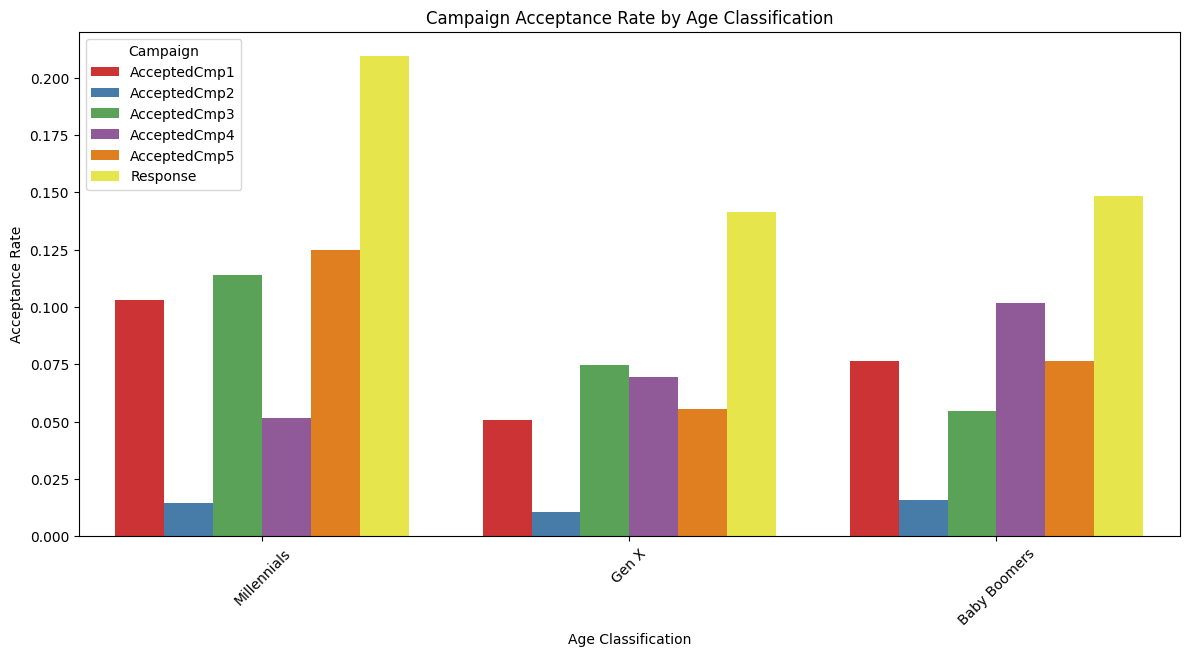

<Figure size 640x480 with 0 Axes>

In [194]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

acceptance_rates_by_income = df.groupby('Age_Range')[campaign_columns].mean().reset_index()

acceptance_rates_by_income = acceptance_rates_by_income.melt(id_vars=['Age_Range'], var_name='Campaign', value_name='Acceptance Rate')

plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Range', y='Acceptance Rate', hue='Campaign', data=acceptance_rates_by_income, palette='Set1')
plt.title('Campaign Acceptance Rate by Age Classification')
plt.xlabel('Age Classification')
plt.ylabel('Acceptance Rate')
plt.legend(title='Campaign', loc='upper left')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
plt.savefig('agerange_campaignacceptancerate.png')

In [202]:
sorted_acceptance_rates = acceptance_rates_by_income.sort_values(by='Acceptance Rate', ascending=False)

print(sorted_acceptance_rates)

       Age_Range      Campaign  Acceptance Rate
15   Millennials      Response         0.209559
17  Baby Boomers      Response         0.148438
16         Gen X      Response         0.141352
12   Millennials  AcceptedCmp5         0.125000
6    Millennials  AcceptedCmp3         0.113971
0    Millennials  AcceptedCmp1         0.102941
11  Baby Boomers  AcceptedCmp4         0.101562
14  Baby Boomers  AcceptedCmp5         0.076563
2   Baby Boomers  AcceptedCmp1         0.076563
7          Gen X  AcceptedCmp3         0.074627
10         Gen X  AcceptedCmp4         0.069359
13         Gen X  AcceptedCmp5         0.055312
8   Baby Boomers  AcceptedCmp3         0.054688
9    Millennials  AcceptedCmp4         0.051471
1          Gen X  AcceptedCmp1         0.050922
5   Baby Boomers  AcceptedCmp2         0.015625
3    Millennials  AcceptedCmp2         0.014706
4          Gen X  AcceptedCmp2         0.010536


Dapat dilihat dari graph diatas bahwa acceptance rate dari campaign yang paling tinggi dari seluruh age range adalah pada campaign yang terakhir kali dikeluarkan oleh supermarket. Dapat dibandingkan dari ketiga age classification, acceptance rate Millennials terhadap campaign terakhir adalah yang tertinggi dibandingkan dengan Gen X dan Baby Boomers. Namun secara keseluruhan, campaign terakhir adalah yang tertinggi acceptance ratenya untuk seluruh age range. Sehingga, kedepannya, materi dari campaign terakhir dapat digunakan kembali bagi supermarket untuk meluncurkan promosinya.

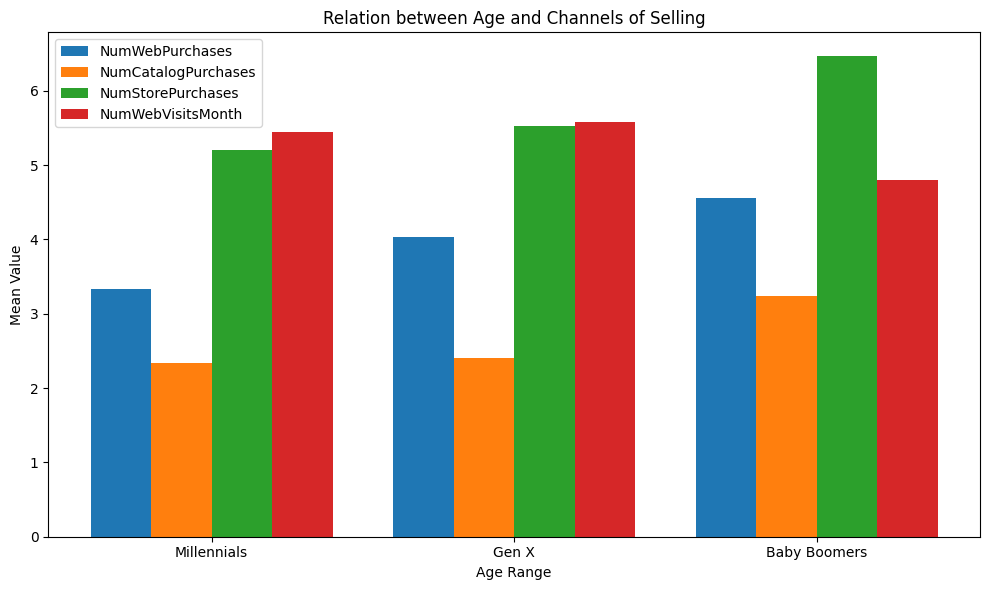

<Figure size 640x480 with 0 Axes>

In [195]:
education_channels = df.groupby('Age_Range')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].mean()

education_channels.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

num_bars = len(education_channels)
bar_width = 0.2
index = range(num_bars)

plt.bar(index, education_channels['NumWebPurchases'], bar_width, label='NumWebPurchases')
plt.bar([i + bar_width for i in index], education_channels['NumCatalogPurchases'], bar_width, label='NumCatalogPurchases')
plt.bar([i + 2 * bar_width for i in index], education_channels['NumStorePurchases'], bar_width, label='NumStorePurchases')
plt.bar([i + 3 * bar_width for i in index], education_channels['NumWebVisitsMonth'], bar_width, label='NumWebVisitsMonth')

plt.xlabel('Age Range')
plt.ylabel('Mean Value')
plt.title('Relation between Age and Channels of Selling')
plt.xticks([i + 1.5 * bar_width for i in index], education_channels['Age_Range'])
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
plt.savefig('agerange_channelsofselling.png')

In [201]:
mean_web_visits = education_channels['NumWebVisitsMonth']
mean_web_purchases = education_channels['NumWebPurchases']

percentage_difference = ((mean_web_visits - mean_web_purchases) / mean_web_purchases) * 100

for age_range, percentage in zip(education_channels['Age_Range'], percentage_difference):
    print(f"Age Range: {age_range}, Percentage Difference (WebVisits vs. WebPurchases): {percentage:.2f}%")

Age Range: Millennials, Percentage Difference (WebVisits vs. WebPurchases): 63.69%
Age Range: Gen X, Percentage Difference (WebVisits vs. WebPurchases): 38.66%
Age Range: Baby Boomers, Percentage Difference (WebVisits vs. WebPurchases): 5.35%


Dari graph diatas dapat dilihat bahwa secara umum, penjualan melalui toko secara langsung masih yang palin gtinggi dari ketiga Age Range. Untuk web purchases baik pada millennials dan gen x pun masih menduduki peringkat kedua, sama seperti baby boomers untuk channel penjualan. Penjualan melalui katalog menduduki peringkat terakhir. Apabila dilihat dari web visits, milennials dan gen x menduduki peringkat yang lebih tinggi dibandingkan dengan Baby Boomers. Hal ini menunjukkan bahwa millennials dan gen x memiliki potensi penjualan yang lebih tinggi apabila melalui web dibandingkan dengan baby boomers.

# Analisis Customers Enrollment Time

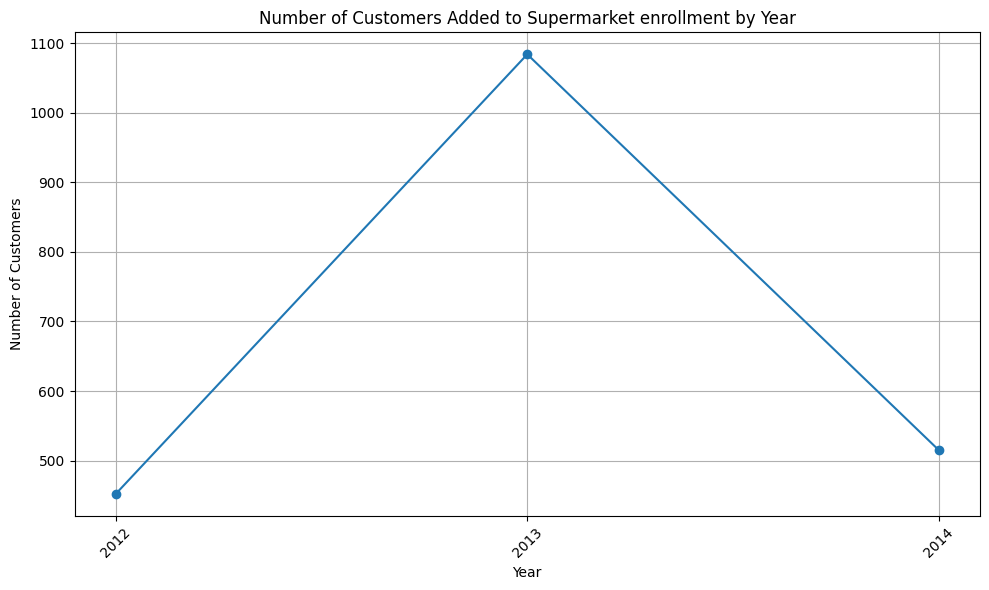

<Figure size 640x480 with 0 Axes>

In [196]:
df['Year'] = df['Dt_Customer'].dt.year

yearly_customer_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_customer_counts.index, yearly_customer_counts.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Added to Supermarket enrollment by Year')
plt.xticks(yearly_customer_counts.index, rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig('customers_added_byYear.png')

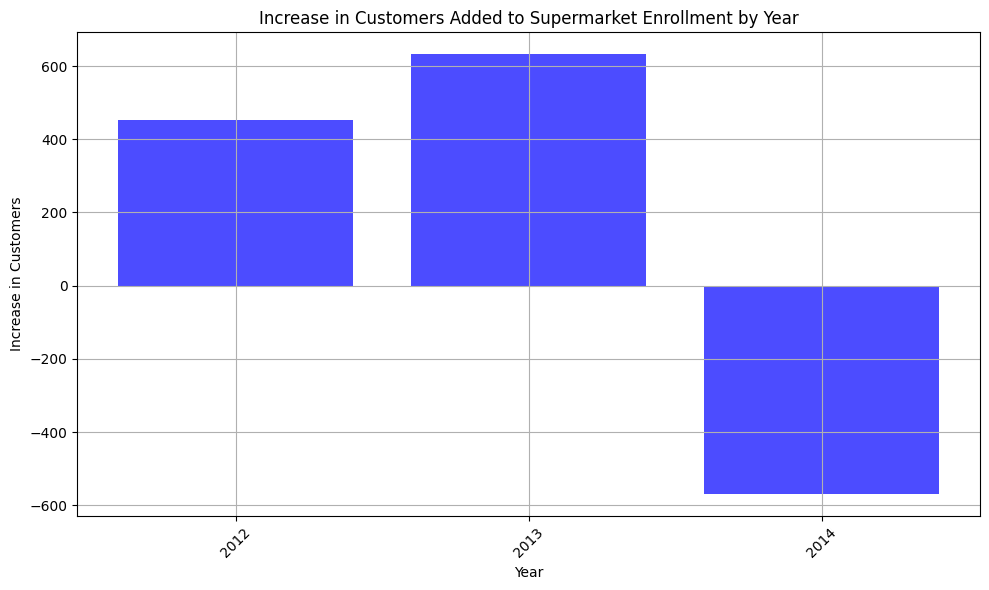

<Figure size 640x480 with 0 Axes>

In [197]:
yearly_customer_counts = df['Year'].value_counts().sort_index()

customer_increase = yearly_customer_counts.diff().fillna(yearly_customer_counts.iloc[0]).astype(int)

plt.figure(figsize=(10, 6))
plt.bar(customer_increase.index, customer_increase.values, color='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Increase in Customers')
plt.title('Increase in Customers Added to Supermarket Enrollment by Year')
plt.xticks(customer_increase.index, rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig('increase_customer_added_supermarket.png')

In [181]:
customer_percentage_change = yearly_customer_counts.pct_change().fillna(0) * 100

percentage_change_table = pd.DataFrame({'Year': yearly_customer_counts.index, 'Percentage Change (%)': customer_percentage_change})

print(percentage_change_table)

      Year  Percentage Change (%)
Year                             
2012  2012               0.000000
2013  2013             139.823009
2014  2014             -52.490775


Dapat dilihat dari visualisasi data diatas bahwa pada 2014 terdapat penurunan customers yang enrolled ke supermarket sebanyak 52.49 %. Sedangkan pada 2013 terjadi kenaikkan sebesar 132.82%. Hal ini mungkin terjadi dikarenakan pada 2 tahun terakhir supermarket kurang merencanakan promotion yang baik terhadap orang yang belum enrolled ke supermarket.

# Analisis Customers Last Purchase

In [182]:
df['Recency'].describe()

count    2051.000000
mean       48.940517
std        28.978165
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

dari kolom recency atau days since customers last purchase, kita dapat mengklasifikasikan customers menjadi; frequent shoppers, occasional shoppers, lapsed shoppers. Berdasarkan describe data diatas, kita bisa mengklasifikasikan 0-33 hari (frequent shoppers), 33 - 66 hari (occasional shoppers), diatas 66 hari (lapsed shoppers).

In [183]:
df['Shopper_Type'] = pd.cut(df['Recency'], bins=[0, 7, 30, float('inf')], labels=['Weekly Shopper', 'Monthly Shopper', 'More than one month Shopper'])


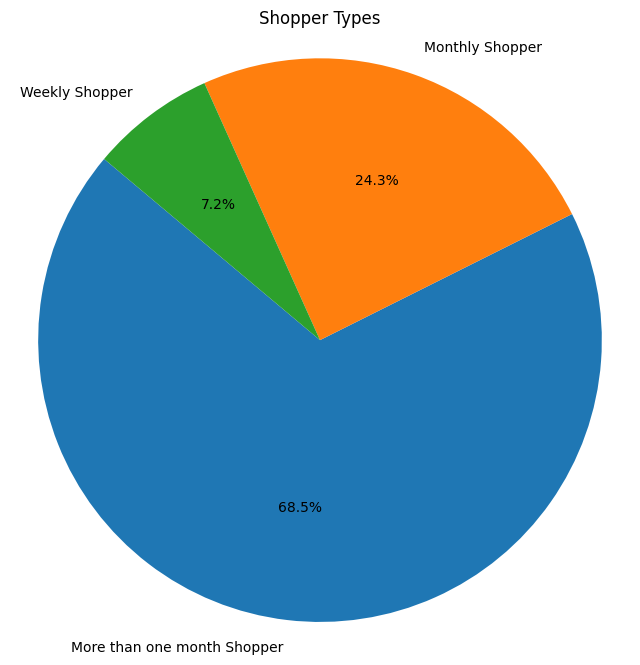

<Figure size 640x480 with 0 Axes>

In [198]:
shopper_type_counts = df['Shopper_Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(shopper_type_counts, labels=shopper_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Shopper Types')
plt.axis('equal')
plt.show()
plt.savefig('shopper_frequency.png')

Dapat dilihat dari data recency bahwa 68.5% dari customer terakhir membeli sudah lebih dari 1 bulan yang lalu. Sedangkan customer dengan pembelian terakhir 7 - 30 hari yang lalu ada pada 24.3% dan untuk customer dengan pembelian terakhir 0-7 hari yang lalu ada pada 7.2%. Oleh karena itu, diperlukan campaign yang efektif ditujukan pada customer segment yang tepat agar customer dapat memilih supermarket ini sebagai langganannya.

# Analisis Customers Complain

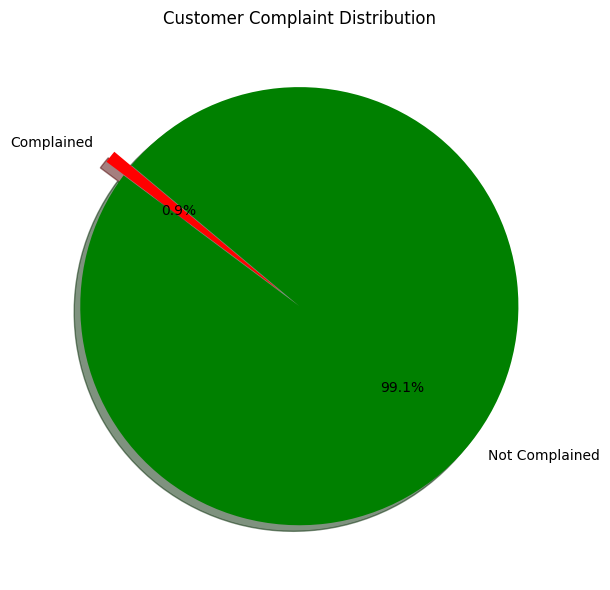

<Figure size 640x480 with 0 Axes>

In [199]:
complained_customers = df[df['Complain'] == 1]

not_complained_customers = df[df['Complain'] == 0]

complaint_counts = len(complained_customers)
no_complaint_counts = len(not_complained_customers)

labels = ['Complained', 'Not Complained']
sizes = [complaint_counts, no_complaint_counts]
colors = ['red', 'green']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Customer Complaint Distribution')

plt.tight_layout()
plt.show()
plt.savefig('customer_complaint.png')

Dari pie chart diatas dapat dilihat bahwa sebanyak 0.9% dari customers melakukan complain. Hal ini cukup baik karena sangat sedikit jumlah customers yang complain terhadap supermarket. Sehingga, pelayanan supermarket tersebut sudah dinyatakan baik berdasarkan data customer yang tersedia.

In [186]:
ds = df[['Recency', 'Complain']]
ds.corr()

,Recency,Complain
Recency,1.000000,-0.001207
Complain,-0.001207,1.000000


Kapan pembelian terakhir dari customers, tidak dipengaruhi oleh complain dan juga sebaliknya.

## Convert df ke CSV file


In [187]:
df.to_csv('C:\Kuliah\Purwadhika Data Science\Module 2 Data Analysis\Capstone Project Module 2\Supermarket Customers Cleaned.csv', index=False)

# Kesimpulan dan Rekomendasi

Dari analisis yang telah dilakukan, dapat diberikan rekomendasi sebagai berikut:
- Customer dengan Mid-Education, Low-Income & Mid-Income, dan Gen X mendominasi supermarket customers.
- Dari identitas customer diatas, mereka banyak spending pada product Wine dan Meat. Oleh karena itu, supermarket harus maintain kualitas dari Wine dan Meat, atau dengan mendiversifikasi jenis wine dan meat nya agar memiliki keunggulan dari kompetitor.
- Dari Campaign yang telah dijalankan, untuk identitas customer diatas, campaign yang terakhir adalah campaign paling efektif. Sehingga, konten marketing dari campaign terakhir harus menjadi bahan untuk campaign berikutnya. Terutama untuk promosi product selain wine dan meat agar penjualan product lainnya meningkat.
- Customer dengan identitas diatas banyak melakukan pembelian langsung melalui toko, namun web visit tergolong tinggi, sehingga promotion untuk encourage customers melakukan pembelian melalui online menjadi peluang bagi supermarket memenangkan kompeitisi sebagai unique selling point. Namun hal ini harus dikaji lebih lanjut agar transisi ke penjualan secara digital dapat berhasil.
- Terjadi penurunan pada setahun terakhir customers yang enroll ke supermarket. Sehingga supermarket perlu encourage service mereka agar customers yang enroll ke data supermarket meningkat sehingga analisis kedepannya dapat lebih akurat dan up to date.
- Supermarket dapat melakukan subscription pada customersnya mengingat pembelian customers rata2 paling banyak adalah lebih dari satu bulan. Hal ini dapat mengurangi angka barang yang tertahan dan mempercepat penjualan mengingat bisnis supermarket terbatas dengan kadaluarsa barang yang dijualnya, terutama untuk product meat.
- Supermarket harus mempertahankan customer servicenya mengingat compliance yang diterima oleh supermarket 2 tahun kebelakang sudah sangat baik yaitu 0.9%.